# This is a sample Jupyter Notebook

Below is an example of a code cell. 
Put your cursor into the cell and press Shift+Enter to execute it and select the next one, or click 'Run Cell' button.

Press Double Shift to search everywhere for classes, files, tool windows, actions, and settings.

To learn more about Jupyter Notebooks in PyCharm, see [help](https://www.jetbrains.com/help/pycharm/ipython-notebook-support.html).
For an overview of PyCharm, go to Help -> Learn IDE features or refer to [our documentation](https://www.jetbrains.com/help/pycharm/getting-started.html).

Programa de Análise de Movimento
Digite os valores de tempo e espaço percorrido separados por vírgulas

Resultados:
Velocidade média: 0.33 m/s
Aceleração média: -11.83 m/s²


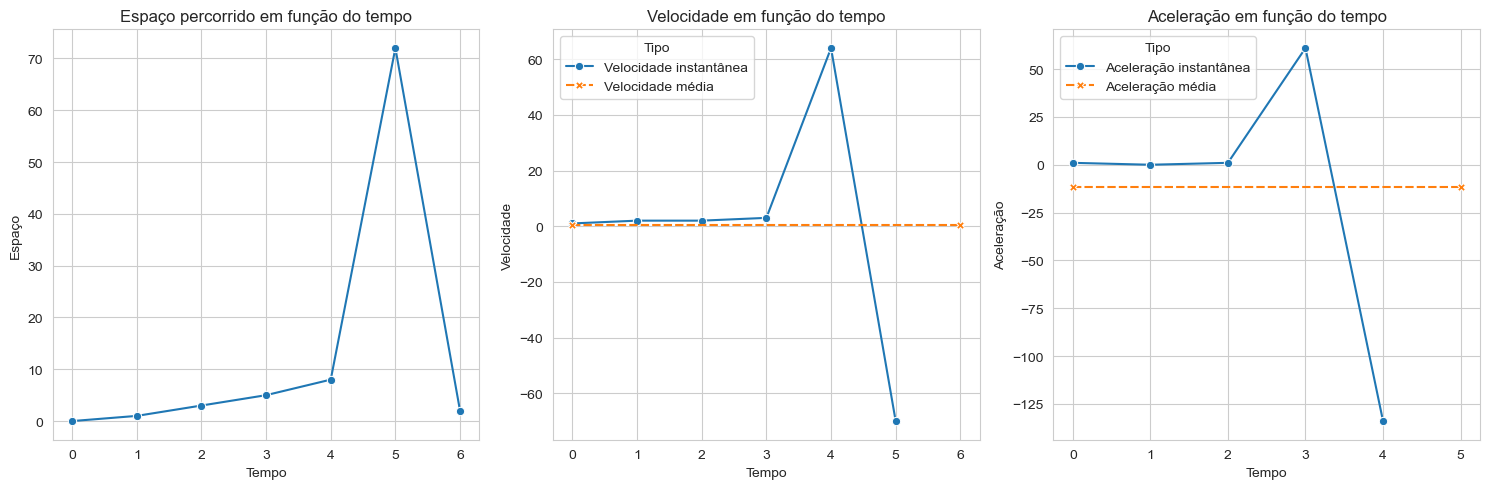

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def calcular_movimento(tempos, espacos):
    """
    Calcula velocidade, velocidade média, aceleração e aceleração média
    a partir de arrays de tempo e espaço.
    """
    # Calculando velocidades instantâneas (derivada do espaço pelo tempo)
    velocidades = np.diff(espacos) / np.diff(tempos)

    # Calculando acelerações instantâneas (derivada da velocidade pelo tempo)
    aceleracoes = np.diff(velocidades) / np.diff(tempos[:-1])

    # Calculando velocidade média (total)
    velocidade_media = (espacos[-1] - espacos[0]) / (tempos[-1] - tempos[0])

    # Calculando aceleração média (total)
    if len(velocidades) > 0:
        aceleracao_media = (velocidades[-1] - velocidades[0]) / (tempos[-1] - tempos[0])
    else:
        aceleracao_media = 0

    return {
        'velocidades': velocidades,
        'aceleracoes': aceleracoes,
        'velocidade_media': velocidade_media,
        'aceleracao_media': aceleracao_media
    }

def plotar_graficos(tempos, espacos, resultados):
    """
    Cria gráficos usando Seaborn para visualizar os dados do movimento.
    """
    # Criando um DataFrame para facilitar a plotagem
    df_espaco = pd.DataFrame({
        'Tempo': tempos,
        'Espaço': espacos,
        'Tipo': 'Espaço percorrido'
    })

    df_velocidade = pd.DataFrame({
        'Tempo': tempos[:-1],
        'Velocidade': resultados['velocidades'],
        'Tipo': 'Velocidade instantânea'
    })

    # Adicionando linha da velocidade média
    df_vel_media = pd.DataFrame({
        'Tempo': [tempos[0], tempos[-1]],
        'Velocidade': [resultados['velocidade_media'], resultados['velocidade_media']],
        'Tipo': 'Velocidade média'
    })

    # Juntando todos os dados de velocidade
    df_vel = pd.concat([df_velocidade, df_vel_media])

    # Configurando o estilo dos gráficos
    sns.set_style("whitegrid")
    plt.figure(figsize=(15, 5))

    # Gráfico 1: Espaço percorrido
    plt.subplot(1, 3, 1)
    sns.lineplot(data=df_espaco, x='Tempo', y='Espaço', marker='o')
    plt.title('Espaço percorrido em função do tempo')

    # Gráfico 2: Velocidades
    plt.subplot(1, 3, 2)
    sns.lineplot(data=df_vel, x='Tempo', y='Velocidade', hue='Tipo', style='Tipo', markers=True)
    plt.title('Velocidade em função do tempo')

    # Gráfico 3: Aceleração (se houver dados suficientes)
    if len(resultados['aceleracoes']) > 0:
        df_aceleracao = pd.DataFrame({
            'Tempo': tempos[:-2],
            'Aceleração': resultados['aceleracoes'],
            'Tipo': 'Aceleração instantânea'
        })

        # Adicionando linha da aceleração média
        df_acel_media = pd.DataFrame({
            'Tempo': [tempos[0], tempos[-2]],
            'Aceleração': [resultados['aceleracao_media'], resultados['aceleracao_media']],
            'Tipo': 'Aceleração média'
        })

        df_acel = pd.concat([df_aceleracao, df_acel_media])

        plt.subplot(1, 3, 3)
        sns.lineplot(data=df_acel, x='Tempo', y='Aceleração', hue='Tipo', style='Tipo', markers=True)
        plt.title('Aceleração em função do tempo')

    plt.tight_layout()
    plt.show()

def main():
    print("Programa de Análise de Movimento")
    print("Digite os valores de tempo e espaço percorrido separados por vírgulas")

    # Entrada de dados
    tempos = input("Tempos (ex: 0,1,2,3,4): ").split(',')
    espacos = input("Espaços percorridos (ex: 0,2,8,18,32): ").split(',')

    # Convertendo para arrays numéricos
    tempos = np.array([float(t) for t in tempos])
    espacos = np.array([float(e) for e in espacos])

    # Verificando se os arrays têm o mesmo tamanho
    if len(tempos) != len(espacos):
        print("Erro: O número de tempos deve ser igual ao número de espaços!")
        return

    # Calculando as grandezas físicas
    resultados = calcular_movimento(tempos, espacos)

    # Exibindo resultados numéricos
    print("\nResultados:")
    print(f"Velocidade média: {resultados['velocidade_media']:.2f} m/s")
    print(f"Aceleração média: {resultados['aceleracao_media']:.2f} m/s²")

    # Plotando gráficos
    plotar_graficos(tempos, espacos, resultados)

if __name__ == "__main__":
    main()